In [9]:
# ---------------------------------------------------------
# Logistic Regression Model for March Madness Prediction
# ---------------------------------------------------------

import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ---------------------------------------------------------
# 1. Load Data
# ---------------------------------------------------------
df = pd.read_csv('/home/lambjos3/cmse492_project/data/raw/cbb.csv')

# ---------------------------------------------------------
# 2. Fix POSTSEASON encoding
# ---------------------------------------------------------
# 1 = made tournament
# 0 = missed tournament
df["POSTSEASON_BINARY"] = df["POSTSEASON"].apply(
    lambda x: 0 if pd.isna(x) or x == "" else 1
)

y = df["POSTSEASON_BINARY"]

# ---------------------------------------------------------
# Feature selection
# ---------------------------------------------------------
features = [
    "W", "ADJOE", "ADJDE", "BARTHAG", "EFG_O", "EFG_D", "TOR", "TORD",
    "ORB", "DRB", "FTR", "FTRD", "2P_O", "2P_D", "3P_O", "3P_D",
    "ADJ_T", "WAB"
]

X = df[features]

# ---------------------------------------------------------
# 3. Train/Test Split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ---------------------------------------------------------
# 4. Scaling
# ---------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------
# 5. Train Model
# ---------------------------------------------------------
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_scaled, y_train)

# ---------------------------------------------------------
# 6. Evaluate
# ---------------------------------------------------------
y_pred = logreg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 7. Feature Importance
# ---------------------------------------------------------
coeffs = pd.DataFrame({
    "Feature": features,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coeffs)


Accuracy: 0.9176954732510288
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       785
           1       0.82      0.73      0.77       187

    accuracy                           0.92       972
   macro avg       0.88      0.85      0.86       972
weighted avg       0.92      0.92      0.92       972

    Feature  Coefficient
17      WAB     3.015864
1     ADJOE     1.972062
0         W     0.778808
4     EFG_O     0.557380
10      FTR     0.179466
7      TORD     0.149970
13     2P_D     0.134286
8       ORB     0.093248
11     FTRD    -0.043495
9       DRB    -0.068646
16    ADJ_T    -0.073524
15     3P_D    -0.084703
6       TOR    -0.133122
14     3P_O    -0.145730
5     EFG_D    -0.254365
12     2P_O    -0.338792
2     ADJDE    -1.630665
3   BARTHAG    -3.693044


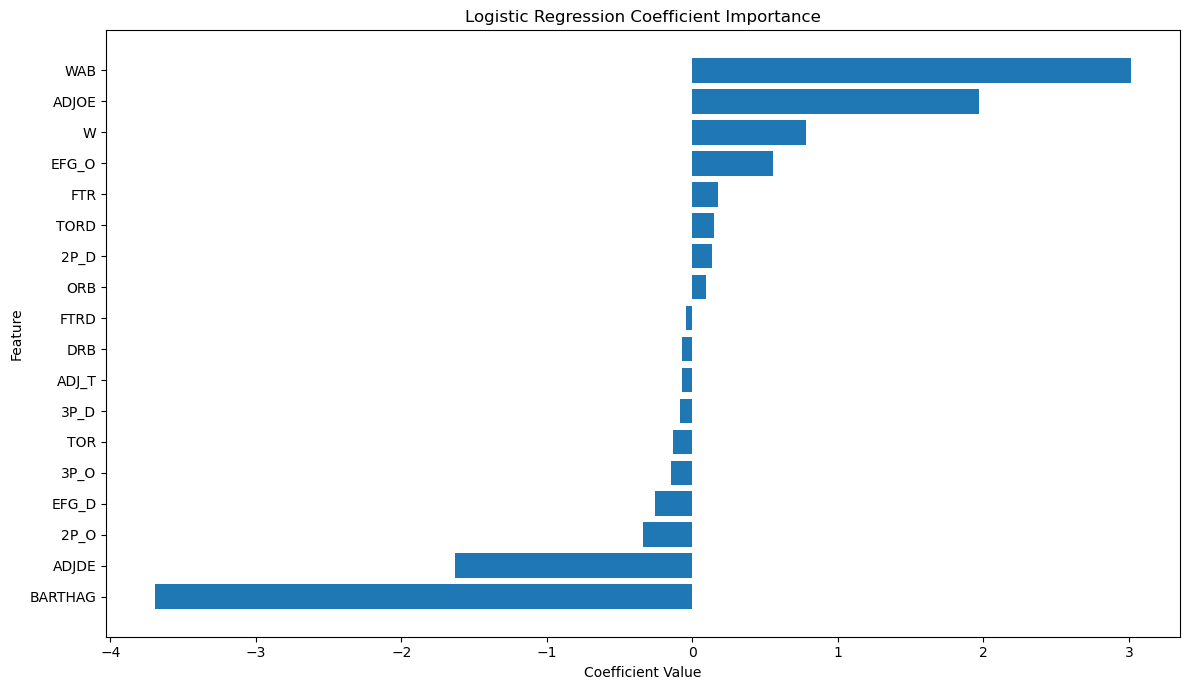

In [11]:
import matplotlib.pyplot as plt
import numpy as np
fig_dir = '/home/lambjos3/cmse492_project/figures'

# ----------------------------------------------
# Create a bar chart for Logistic Regression Coefficients
# ----------------------------------------------

coef_values = model.coef_[0]
features_arr = np.array(features)

# Sort coefficients by magnitude
sorted_idx = np.argsort(coef_values)
sorted_coef = coef_values[sorted_idx]
sorted_features = features_arr[sorted_idx]

plt.figure(figsize=(12, 7))
plt.barh(sorted_features, sorted_coef)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Logistic Regression Coefficient Importance")
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'logistic_regression.png'))
plt.show()